## More on tensorflow

In [1]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

In [2]:
''' local MNIST data repos:
C:\\gitLocal\\ML\\data\\MNIST_data
C:\\Users\\daij12\\MNIST_data
'''
mnist_dir = 'C:\\gitLocal\\ML\\tensorflow\\MNIST_data'
mnist_data = read_data_sets(train_dir=mnist_dir,one_hot=True)

Extracting C:\gitLocal\ML\tensorflow\MNIST_data\train-images-idx3-ubyte.gz
Extracting C:\gitLocal\ML\tensorflow\MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:\gitLocal\ML\tensorflow\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\gitLocal\ML\tensorflow\MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
mnist_data.train.num_examples, mnist_data.test.num_examples, mnist_data.validation.num_examples

(55000, 10000, 5000)

In [4]:
mnist_data.train.images.shape

(55000, 784)

In [5]:
mnist_data.train.images[0].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [6]:
import matplotlib.pyplot as plt

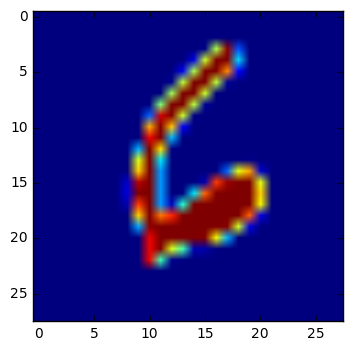

In [7]:
plt.imshow(mnist_data.train.images[3].reshape(28,28));plt.show()

In [8]:
mnist_data.train.labels[3]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [9]:
mnist_data.train.next_batch(3)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]]))

In [10]:
import tensorflow as tf

In [11]:
sess = tf.InteractiveSession()

In [12]:
sess.run(tf.truncated_normal([2,2],stddev=.1))

array([[-0.0356777 , -0.02805187],
       [-0.01335227, -0.00407047]], dtype=float32)

In [13]:
# Build the graph
x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

In [14]:

W1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1))

In [15]:
conv = tf.nn.conv2d(x_image, W1,strides=[1,1,1,1], padding='SAME')

In [16]:
b = tf.Variable(tf.constant(0.1, shape=[32]))

In [17]:
conv1 = tf.nn.relu(conv+b)

In [18]:
W2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[64]))

In [19]:
W_f = tf.Variable(tf.truncated_normal([7*7*64,1024], stddev=0.1))
b_f = tf.Variable(tf.constant(0.1, shape=[1024]))

In [20]:
W_f2 = tf.Variable(tf.truncated_normal([1024,10], stddev=0.1))
b_f2 = tf.Variable(tf.constant(0.1, shape=[10]))

In [21]:
conv_p = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [22]:
conv_ = tf.nn.conv2d(conv_p, W2,strides=[1,1,1,1], padding='SAME')
conv2 = tf.nn.relu(conv_+b2)
conv_p2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [23]:
h_p = tf.reshape(conv_p2,[-1,7*7*64])
h_f = tf.nn.relu(tf.add(tf.matmul(h_p,W_f),b_f))

In [24]:
yhat = tf.add(tf.matmul(h_f,W_f2),b_f2)

In [25]:
y = tf.placeholder(tf.float32, shape=[None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))

In [26]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [27]:
sess.run(tf.global_variables_initializer())

In [29]:
for b in range(20):
    btch_x, btch_y = mnist_data.train.next_batch(10)
    train_step.run(feed_dict={x:btch_x,y:btch_y})

In [30]:
btch_x, btch_y = mnist_data.test.next_batch(1)
sess.run([conv,conv1,conv_p,conv_,conv2,conv_p2,yhat],feed_dict={x:btch_x,y:btch_y})

[array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ..., 
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ..., 
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          ..., 
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
         ..., 
         [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,